# 必要なライブラリーのインストール

In [1]:
from biosppy.signals import ecg
from biosppy import storage

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# サンプル信号の読み込み
- サンプルデータはBiosppy プロジェクトが用意しているサンプルデータを使用<br>
  https://github.com/PIA-Group/BioSPPy/blob/master/examples/ecg.txt
- メタデータを確認することで、サンプリングレートなどを確認する

In [2]:
signals, meta = storage.load_txt("./ecg.txt")
print(meta)

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}


# 冒頭5秒間のデータを表示

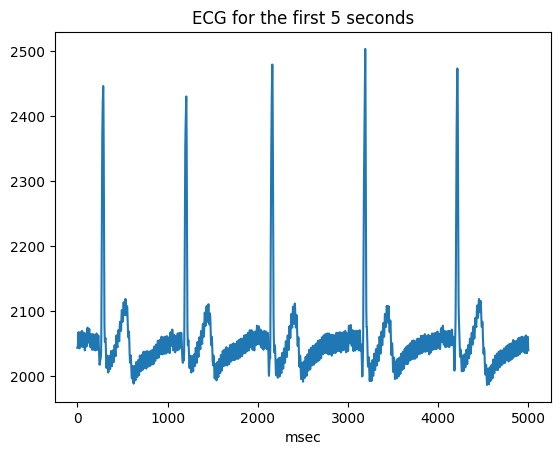

In [3]:
sampling_rate = meta["sampling_rate"]
idx = 5 * sampling_rate
signals_0_5s = signals[0:int(idx)]
plt.title("ECG for the first 5 seconds")
plt.xlabel("msec")
plt.plot(signals_0_5s)
plt.show()

# Rピーク検出・RRIの計算
Biosppy の`hamilton_segmenter` という関数を用いることで、ECGのRピークを検出することができる.

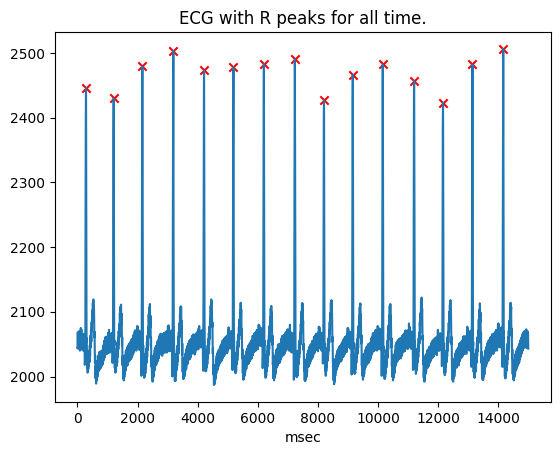

In [4]:
rpeaks = ecg.hamilton_segmenter(signals, sampling_rate=sampling_rate)["rpeaks"]

plt.title("ECG with R peaks for all time.")
plt.scatter(rpeaks, signals[rpeaks], marker="x", color="red")
plt.plot(signals)
plt.xlabel("msec")
plt.show()

Text(0, 0.5, 'msec')

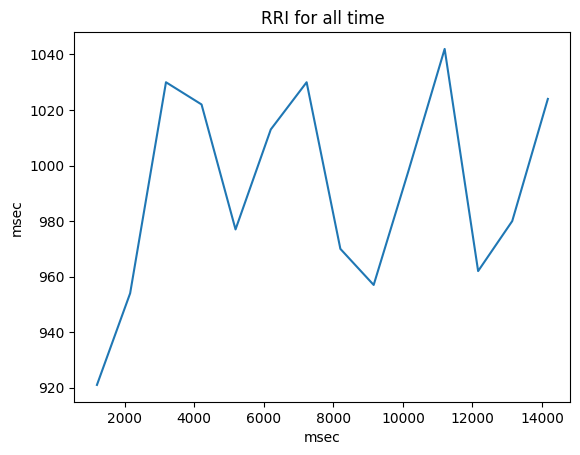

In [10]:
rri = np.diff(rpeaks)
plt.title("RRI for all time")
plt.plot(rpeaks[1:], rri)
plt.xlabel("msec")
plt.ylabel("msec")